In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
import seaborn as sns


In [47]:
X, y= make_regression(n_samples=100,n_features=1,n_informative=1,
                     n_targets=1,noise=20,random_state=13
                     )

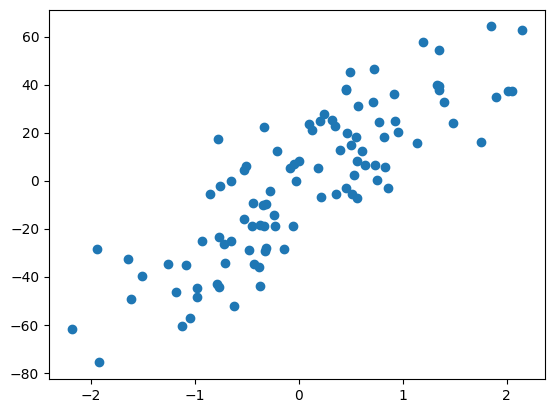

In [48]:
plt.scatter(X,y)

In [49]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [50]:
from sklearn.linear_model import Ridge

rr=Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.126913003523573


In [51]:
from sklearn.linear_model import Ridge

rr1=Ridge(alpha=20)
rr1.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.126913003523573


In [52]:
rr2=Ridge(alpha=100)
rr2.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.126913003523573


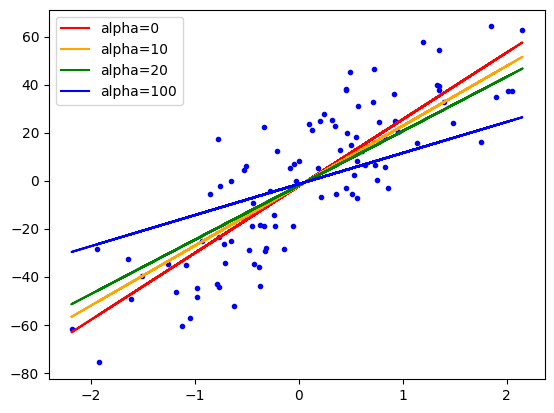

In [53]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='orange',label='alpha=10')
plt.plot(X,rr1.predict(X),color='green',label='alpha=20')
plt.plot(X,rr2.predict(X),color='blue',label='alpha=100')
plt.legend()

In [55]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [57]:
X,y = load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)


In [58]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass

In [59]:
reg = MeraRidge(alpha=100)
reg.fit(X,y)

[ 3.01171361  0.69025105  9.40034911  7.07661643  3.39855893  2.78994647
 -6.32817108  6.89983198  9.07066707  6.13091902] [152.13348416 152.13348416 152.13348416 152.13348416 152.13348416
 152.13348416 152.13348416 152.13348416 152.13348416 152.13348416]


In [64]:
class MeraRidge2:

    def __init__(self,alpha=0.1):
        self.alpha=alpha
        
        self.coef_=None
        self.intercept_=None

    def fit(self,X_train,y_train):
        X_train=np.insert(X_train,0,1,axis=1)
        I=np.identity(X_train.shape[1])

        result=np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha*I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]

    

    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [65]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [66]:
reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.4693128853309806
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602816


In [67]:
reg = MeraRidge2()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.46921361559931907
[  44.04252774 -241.72019592  452.99153345  332.06044266  -76.32617866
  -68.54884462 -165.01664054  149.93980143  431.59483654   58.54419942]
150.84762720023167
